In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 90%; }
</style>
"""))

### Creating separate Dataframe for each dataset

#### Exploring Book Catalogues

In [4]:
df_book_catlg =pd.read_csv('C://Users//rupadhyay//Desktop//ML//Analytics Summit Bibliotheca E Book subscription prediction//Data//BOOKSCATALOGUE.csv',encoding='latin1')

In [5]:
df_book_catlg.shape

(40185, 3)

In [5]:
df_book_catlg.head(5)

,BookID,STATE,SUBSTATE
0,174285,New Mexico,New Mexico
1,176660,Oregon,Oregon
2,140353,Arizona,Arizona
3,178378,New York,New York
4,128711,California,Orange


In [6]:
#Checking Nulls
df_book_catlg.isnull().sum()

BookID      0
STATE       0
SUBSTATE    0
dtype: int64

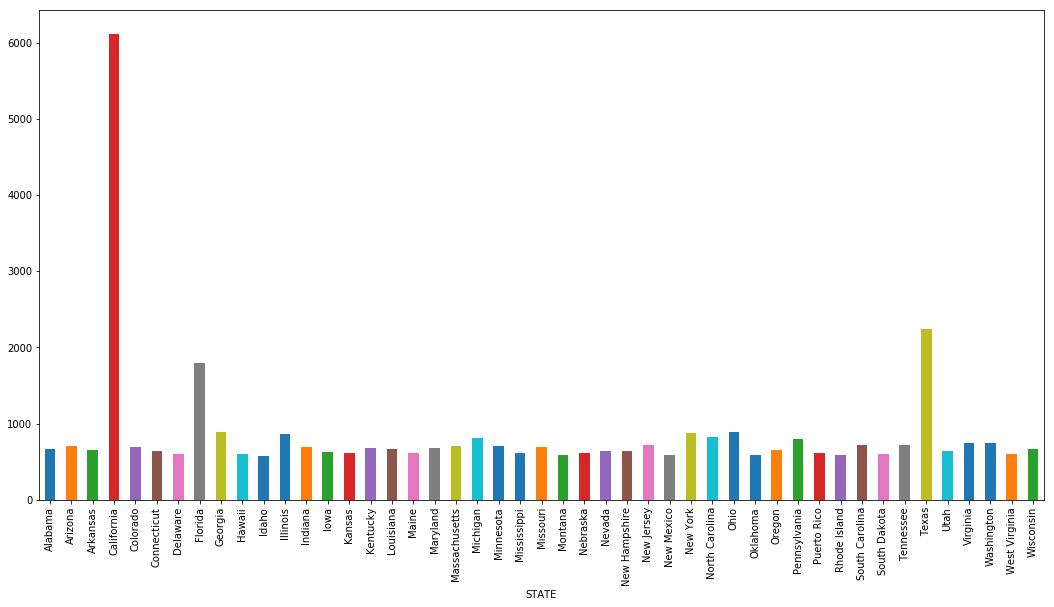

In [7]:
df_book_catlg.groupby('STATE').BookID.count().plot.bar( align='center',figsize=(18,9))
plt.show()

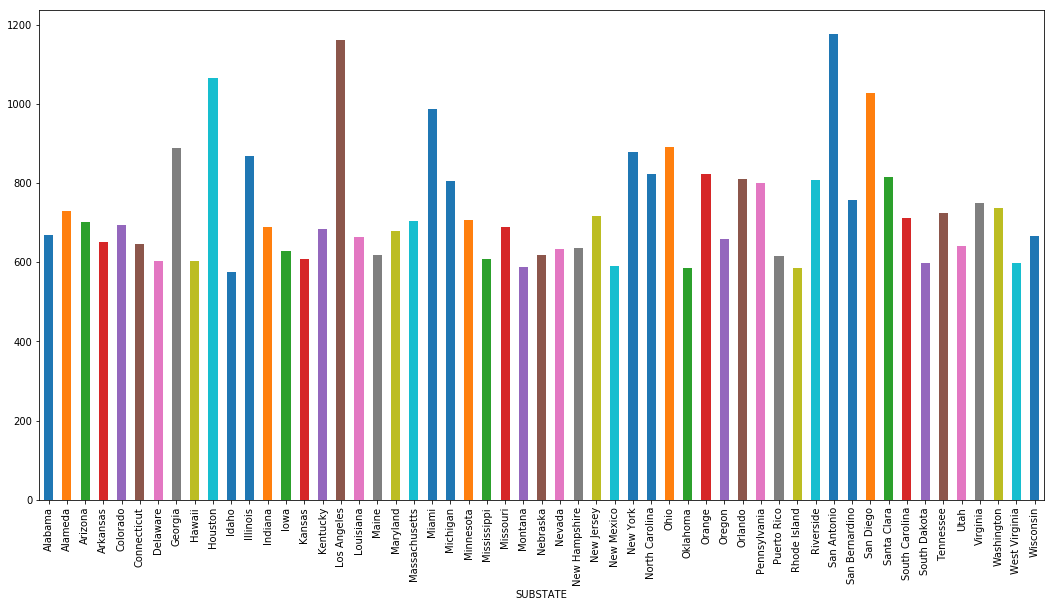

In [8]:
df_book_catlg.groupby('SUBSTATE').BookID.count().plot.bar( align='center',figsize=(18,9))
plt.show()

# Shows normal distribution of books across Substates. As book purchase history data is at a substate level, 
# shows books are purchased normally across substates

## Exploring the Training Data

In [6]:
df_mstr_trn =pd.read_csv('C://Users//rupadhyay//Desktop//ML//Analytics Summit Bibliotheca E Book subscription prediction//Data//BOOKSMASTERTRAIN.csv',encoding='latin1')

In [7]:
df_mstr_test =pd.read_csv('C://Users//rupadhyay//Desktop//ML//Analytics Summit Bibliotheca E Book subscription prediction//Data//BOOKSMASTERTEST.csv',encoding='latin1')

In [10]:
df_mstr_trn.shape

(4469, 14)

In [11]:
df_mstr_trn.head(5)

,BookID,GENRE,BOOKTITLE,BOOKNAME,SERIES,AUTHOR,USERRATINGS,OTHERPRINTEDINFO,DETAILS,SUMMARY,GENRE.1,AUTHORDESC,COVERPAGE,Popularity
0,114530.0,Fiction,The Curious Incident of the Dog in the Night-T...,The Curious Incident of the Dog in the Night-Time,NaN,Mark Haddon,3.87,"['Paperback, Vintage Contemporaries, 226 pages...","[('Original Title', 'The Curious Incident of t...",Christopher John Francis Boone knows all the c...,Fiction,"Mark Haddon is a British novelist and poet, be...",https://images.gr-assets.com/books/1479863624l...,15417.968518
1,133131.0,Science Fiction,Rainbows End by Vernor Vinge,Rainbows End,NaN,Vernor Vinge,3.76,"['Paperback, 381 pages', 'Published April 3rd ...","[('Original Title', 'Rainbows End'), ('ISBN', ...",Robert Gu is a recovering Alzheimer's patient....,Science Fiction,Vernor Steffen Vinge is a retired San Diego St...,https://images.gr-assets.com/books/1316729149l...,218.146718
2,153927.0,Nonfiction,See No Evil: The True Story of a Ground Soldie...,See No Evil: The True Story of a Ground Soldie...,NaN,Robert B. Baer,3.93,"['Paperback, 320 pages', 'Published January 7t...","[('Original Title', ""See No Evil: The True Sto...","In his explosive New York Times bestseller, to...",Nonfiction,ROBERT B. BAER is one of the most accomplished...,https://images.gr-assets.com/books/1388208656l...,64.196614
3,160262.0,History,Augustus: The Life of Rome's First Emperor by ...,Augustus: The Life of Rome's First Emperor,NaN,Anthony Everitt,4.03,"['Hardcover, 327 pages', 'Published October 17...","[('Original Title', ""Augustus: The Life of Rom...",He found Rome made of clay and left it made of...,History,Anthony Everitt is a British academic. He stud...,https://images.gr-assets.com/books/1320442616l...,77.324027
4,133451.0,Mystery,"An Unquiet Grave (Louis Kincaid, #7) by P.J. P...",An Unquiet Grave,(Louis Kincaid #7),P.J. Parrish,4.12,"['Paperback, 384 pages', 'Published February 1...","[('Original Title', 'An Unquiet Grave (Louis K...",Not Every Soul Rest in PeaceIn a remote corner...,Mystery,P.J. Parrish is the New York Times bestselling...,https://images.gr-assets.com/books/1434909833l...,10.454410


In [8]:
#Dropping duplicate column GENRE
df_mstr_trn.drop('GENRE.1', axis=1, inplace=True)

In [13]:
#Checking Nulls
df_mstr_trn.isnull().sum()

BookID                 0
GENRE                  0
BOOKTITLE              0
BOOKNAME               0
SERIES              2613
AUTHOR                 0
USERRATINGS            0
OTHERPRINTEDINFO       0
DETAILS                0
SUMMARY                0
AUTHORDESC             0
COVERPAGE              0
Popularity             0
dtype: int64

In [9]:
# More than 50% of series values are NULL, can be dropped
df_mstr_trn.drop('SERIES', axis=1, inplace=True)

In [10]:
df_mstr_trn['GENRE'].unique()

array(['Fiction', 'Science Fiction', 'Nonfiction', 'History', 'Mystery',
       'Young Adult', 'Fantasy', 'Biography', 'Romance', 'Classics',
       'Historical > Historical Fiction', 'Childrens > Picture Books',
       'Horror'], dtype=object)

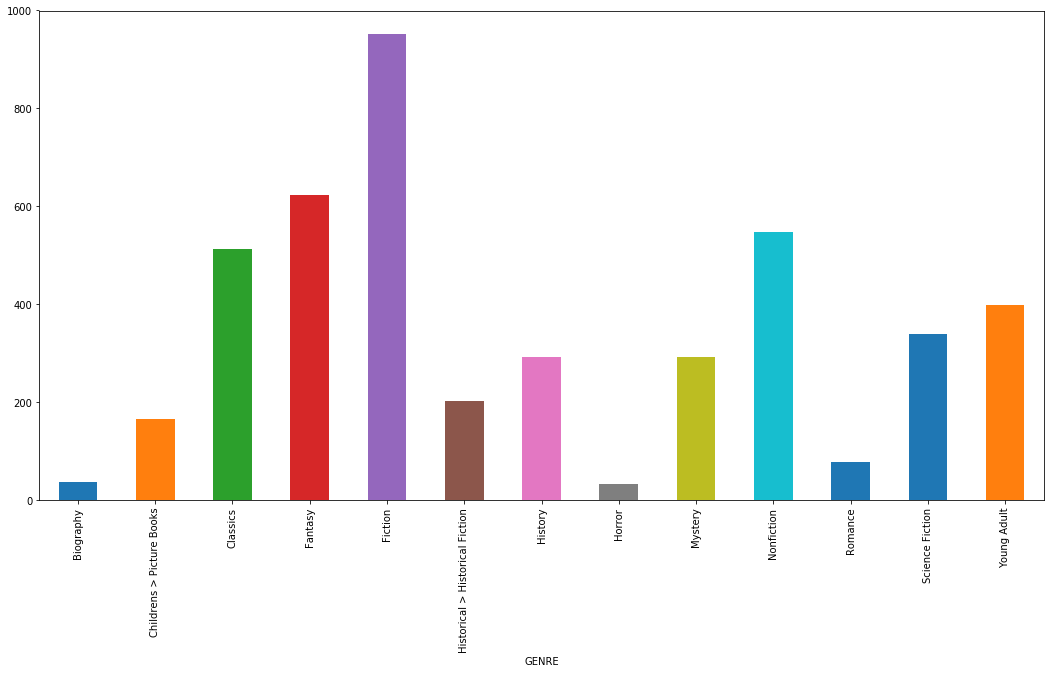

In [16]:
df_mstr_trn.groupby('GENRE').BookID.count().plot.bar( align='center',figsize=(18,9))
plt.show()

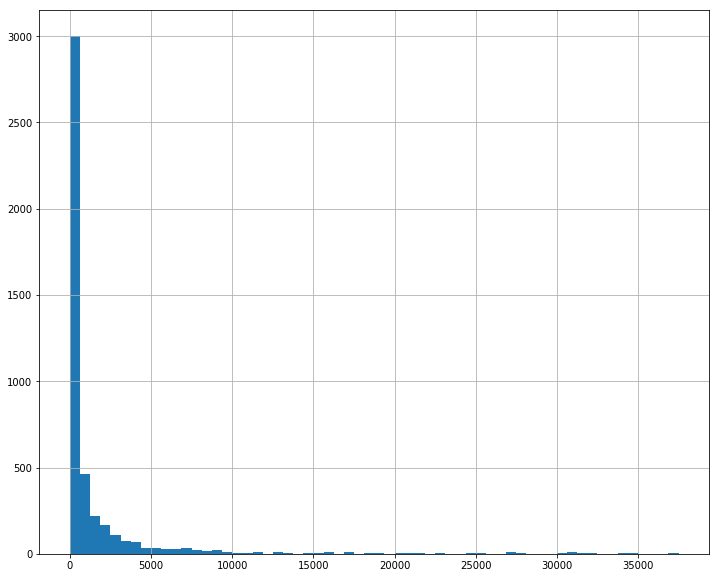

In [17]:
fig = plt.figure(figsize = (12,10))
ax = fig.gca()
df_mstr_trn['Popularity'].hist(ax = ax, bins=60)

#### ~90% popularity scores are within 5000. We see few outliers in the range (5000,40000). 

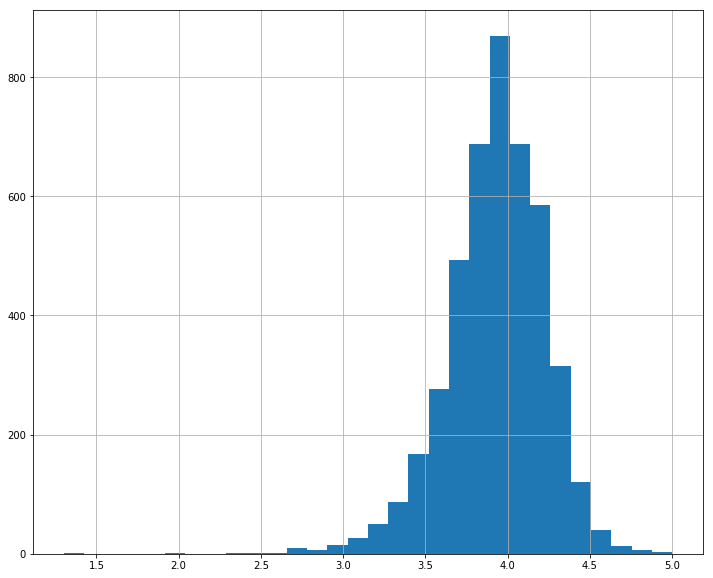

In [18]:
fig = plt.figure(figsize = (12,10))
ax = fig.gca()
df_mstr_trn['USERRATINGS'].hist(ax = ax, bins=30)

#### Pretty normal distribution of ratings, hardly any outliers

### Exploring Book Purchase History

In [19]:
df_bk_prchs_hist =pd.read_csv('C://Users//rupadhyay//Desktop//ML//Analytics Summit Bibliotheca E Book subscription prediction//Data//BOOKSPURCHHISTORY.csv',encoding='latin1')

In [20]:
df_bk_prchs_hist.shape

(43072, 5)

In [21]:
#Checking Nulls
df_bk_prchs_hist.isnull().sum()

BookID        0
UserID        0
TIMESTAMP     0
SUBSTATE      0
WeekofYear    0
dtype: int64

In [22]:
df_bk_prchs_hist.head(5)

,BookID,UserID,TIMESTAMP,SUBSTATE,WeekofYear
0,140361,608502,2018-02-19 13:29:21,Santa Clara,201808
1,118603,673204,2018-09-13 18:40:04,San Diego,201837
2,170523,641650,2018-07-05 00:48:14,Oklahoma,201827
3,111924,619531,2018-06-22 21:53:19,Orlando,201825
4,178056,628661,2018-02-20 18:28:27,Orange,201808


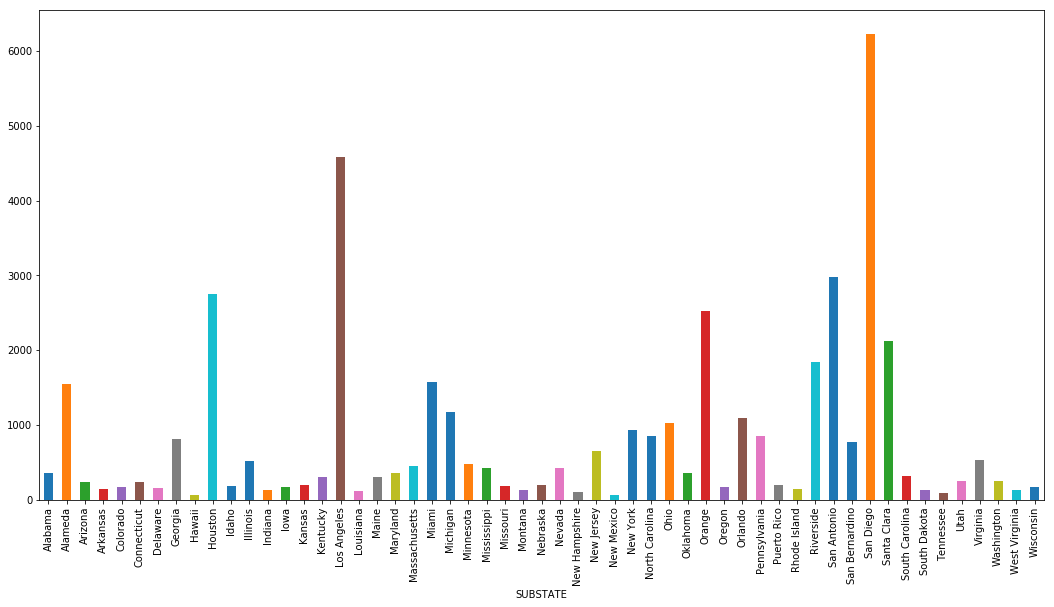

In [23]:
df_bk_prchs_hist.groupby('SUBSTATE').BookID.count().plot.bar( align='center',figsize=(18,9))
plt.show()

#Similar graph against number of books/number of users

### Exploring Book Visit History

In [11]:
df_bk_visit_hist =pd.read_csv('C://Users//rupadhyay//Desktop//ML//Analytics Summit Bibliotheca E Book subscription prediction//Data//BOOKSVISITHISTORY.csv',encoding='latin1')

In [6]:
df_bk_visit_hist.shape

(581232, 8)

In [26]:
df_bk_visit_hist.isnull().sum()

UserID           0
BookID           0
SESSIONID        0
REFERRALID       0
TIMESTAMP        0
BOOKPREVIEWED    0
SUBSCRIBED       0
WeekofYear       0
dtype: int64

In [27]:
df_bk_visit_hist.head(5)

,UserID,BookID,SESSIONID,REFERRALID,TIMESTAMP,BOOKPREVIEWED,SUBSCRIBED,WeekofYear
0,637280,170387,276725249,3401168,2018-09-06 15:39:31,1,0,201836
1,656222,123033,277507996,3400002,2018-09-07 14:46:42,1,0,201836
2,660216,128265,276144807,3404417,2017-12-27 16:43:18,1,0,201752
3,654353,139601,276605171,3400002,2018-05-03 22:57:35,1,0,201818
4,614789,168842,275260040,3605387,2018-04-04 14:12:34,1,0,201814


In [28]:
df_bk_visit_hist['BOOKPREVIEWED'].unique()

array([1], dtype=int64)

In [12]:
#Since it has only 1 value, can be dropped
df_bk_visit_hist.drop('BOOKPREVIEWED', axis=1, inplace=True)

In [30]:
df_bk_visit_hist.head(5)

,UserID,BookID,SESSIONID,REFERRALID,TIMESTAMP,SUBSCRIBED,WeekofYear
0,637280,170387,276725249,3401168,2018-09-06 15:39:31,0,201836
1,656222,123033,277507996,3400002,2018-09-07 14:46:42,0,201836
2,660216,128265,276144807,3404417,2017-12-27 16:43:18,0,201752
3,654353,139601,276605171,3400002,2018-05-03 22:57:35,0,201818
4,614789,168842,275260040,3605387,2018-04-04 14:12:34,0,201814


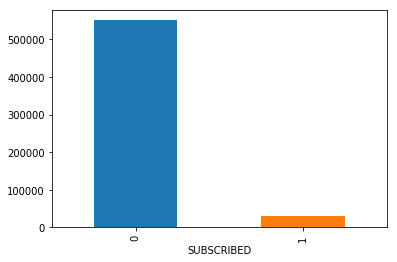

In [31]:
df_bk_visit_hist.groupby('SUBSCRIBED').UserID.count().plot.bar( align='center',figsize=(6,4))
plt.show()

### Exploring USERMASTER data

In [13]:
df_usr_mstr =pd.read_csv('C://Users//rupadhyay//Desktop//ML//Analytics Summit Bibliotheca E Book subscription prediction//Data//USERMASTER.csv',encoding='latin1')

In [33]:
df_usr_mstr.shape

(15000, 6)

In [34]:
df_usr_mstr.isnull().sum()

UserID            0
SIGNUPDATE        0
DELETED       14387
AGEGROUP          0
GENDER            0
STATE          4755
dtype: int64

In [35]:
df_usr_mstr.head(5)

,UserID,SIGNUPDATE,DELETED,AGEGROUP,GENDER,STATE
0,600003,2018-09-07 01:29:02,NaN,28.0,FEMALE,NaN
1,600008,2017-11-02 20:33:20,NaN,43.0,MALE,NaN
2,600011,2017-11-21 02:03:30,NaN,35.0,MALE,NaN
3,600017,2018-02-13 12:21:22,2018-08-06 15:36:27,27.0,MALE,Massachusetts
4,600020,2017-11-13 22:29:13,NaN,53.0,MALE,Pennsylvania


#### Can pick gender from here. Can engineer Age group from the given age.. create multiple age brackets

### Joining DFs 

Since Visit History contains all the information about purchase as well, Purchase History dataset can be ignored. The only column which can be pulled from there is SUBSTATE, but that would be available for the users purchasing the books.

For now, we can join USERMASTER and BOOKSVISITHISTORY on UserID

In [14]:
df_1 = [df_bk_visit_hist,df_usr_mstr]
df_user_1 = reduce(lambda left,right: pd.merge(left,right,on=('UserID')), df_1)

In [15]:
df_user_1.shape
#retaining all 581232 rows

(581232, 12)

In [38]:
df_user_1.head(5)

,UserID,BookID,SESSIONID,REFERRALID,TIMESTAMP,SUBSCRIBED,WeekofYear,SIGNUPDATE,DELETED,AGEGROUP,GENDER,STATE
0,637280,170387,276725249,3401168,2018-09-06 15:39:31,0,201836,2018-04-29 13:23:05,NaN,41.0,MALE,California
1,637280,128994,276725100,3400002,2018-05-05 14:35:51,0,201818,2018-04-29 13:23:05,NaN,41.0,MALE,California
2,637280,139599,276724867,3400002,2018-05-11 21:06:21,0,201819,2018-04-29 13:23:05,NaN,41.0,MALE,California
3,637280,133739,276725326,3400002,2018-09-16 14:44:20,0,201837,2018-04-29 13:23:05,NaN,41.0,MALE,California
4,637280,102364,276725088,3400002,2018-07-04 19:24:44,0,201827,2018-04-29 13:23:05,NaN,41.0,MALE,California


### creating master DF 


In [16]:
df_2 = [df_user_1,df_mstr_trn]
df_user_2 = reduce(lambda left,right: pd.merge(left,right,on=('BookID')), df_2)

In [11]:
### HAVE TO RECOMMEND ON TEST SET 
df_3 = [df_user_1,df_mstr_test]
df_user_3 = reduce(lambda left,right: pd.merge(left,right,on=('BookID')), df_3)

In [40]:
df_user_2.shape
#Retaining all records

(581232, 23)

In [16]:
df_user_3

,UserID,BookID,SESSIONID,REFERRALID,TIMESTAMP,SUBSCRIBED,WeekofYear,SIGNUPDATE,DELETED,AGEGROUP,...,SERIES,AUTHOR,USERRATINGS,OTHERPRINTEDINFO,DETAILS,SUMMARY,GENRE.1,AUTHORDESC,COVERPAGE,Popularity


In [41]:
df_user_2.head(5)

,UserID,BookID,SESSIONID,REFERRALID,TIMESTAMP,SUBSCRIBED,WeekofYear,SIGNUPDATE,DELETED,AGEGROUP,...,BOOKTITLE,BOOKNAME,AUTHOR,USERRATINGS,OTHERPRINTEDINFO,DETAILS,SUMMARY,AUTHORDESC,COVERPAGE,Popularity
0,637280,170387,276725249,3401168,2018-09-06 15:39:31,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure by Philip Gourevitch,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506
1,637280,170387,276725249,3400002,2018-09-06 15:35:25,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure by Philip Gourevitch,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506
2,637280,170387,276725242,3401168,2018-09-06 14:03:23,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure by Philip Gourevitch,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506
3,637280,170387,276725242,3412043,2018-09-06 14:29:39,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure by Philip Gourevitch,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506
4,637280,170387,276725242,3401164,2018-09-06 13:58:30,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure by Philip Gourevitch,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506


#### Ignored Book Catalogue for now, since it only contains the state where books were sold/available i guess.. has 1:n relationship..

#### Creating Age categories

In [17]:
def categorize_age(age):
    if age < 18: return '0-17'
    elif age < 25: return '18-24'
    elif age < 35: return '25-34'
    elif age < 45: return '35-44'
    elif age < 55: return '45-54'
    elif age < 65: return '55-64'
    else: return '65+'
 

In [18]:
df_user_2['Age_Category'] = df_user_2.AGEGROUP.apply(lambda x:categorize_age(x))

In [44]:
df_user_2.head(5)

,UserID,BookID,SESSIONID,REFERRALID,TIMESTAMP,SUBSCRIBED,WeekofYear,SIGNUPDATE,DELETED,AGEGROUP,...,BOOKNAME,AUTHOR,USERRATINGS,OTHERPRINTEDINFO,DETAILS,SUMMARY,AUTHORDESC,COVERPAGE,Popularity,Age_Category
0,637280,170387,276725249,3401168,2018-09-06 15:39:31,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506,35-44
1,637280,170387,276725249,3400002,2018-09-06 15:35:25,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506,35-44
2,637280,170387,276725242,3401168,2018-09-06 14:03:23,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506,35-44
3,637280,170387,276725242,3412043,2018-09-06 14:29:39,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506,35-44
4,637280,170387,276725242,3401164,2018-09-06 13:58:30,0,201836,2018-04-29 13:23:05,NaN,41.0,...,Standard Operating Procedure,Philip Gourevitch,3.91,"['Hardcover, First edition, 286 pages', 'Publi...","[('Original Title', 'Standard Operating Proced...",An utterly original literary and intellectual ...,"Gourevitch was born in Philadelphia, Pennsylva...",https://images.gr-assets.com/books/1392555075l...,6.385506,35-44


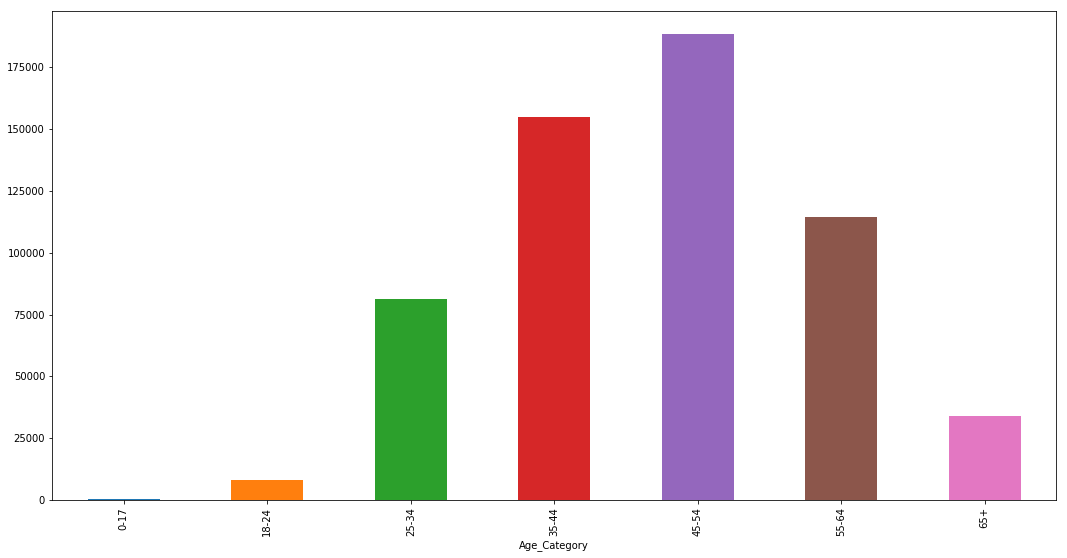

In [45]:
df_user_2.groupby('Age_Category').BookID.count().plot.bar( align='center',figsize=(18,9))
plt.show()


In [28]:
df_user_2.columns

Index(['UserID', 'BookID', 'SESSIONID', 'REFERRALID', 'TIMESTAMP',
       'SUBSCRIBED', 'WeekofYear', 'SIGNUPDATE', 'DELETED', 'AGEGROUP',
       'GENDER', 'STATE', 'GENRE', 'BOOKTITLE', 'BOOKNAME', 'AUTHOR',
       'USERRATINGS', 'OTHERPRINTEDINFO', 'DETAILS', 'SUMMARY', 'AUTHORDESC',
       'COVERPAGE', 'Popularity', 'Age_Category'],
      dtype='object')

In [19]:
## Creating column PAGES from OTHERPRINTEDINFO
df_user_2['PAGES'] = df_user_2['OTHERPRINTEDINFO'].str.extract('(?P<PAGES>\d* (?=pages))', expand=True)

In [20]:
## Creating column PUBLISH_YEAR from OTHERPRINTEDINFO
df_user_2['PUBLISH_YEAR'] = df_user_2['OTHERPRINTEDINFO'].str.extract('(?P<PUBLISH_YEAR>\d* (?=by))', expand=True)

In [75]:
df_user_consolidated = df_user_2[['UserID','BookID','TIMESTAMP','SUBSCRIBED','WeekofYear','AGEGROUP','GENDER','STATE','GENRE','BOOKNAME','AUTHOR','USERRATINGS','Popularity','Age_Category','PAGES','PUBLISH_YEAR','SUMMARY']].copy()

In [23]:
df_user_consolidated.shape

(581232, 17)

In [194]:
df_user_consolidated.dtypes

UserID            int64
BookID            int64
TIMESTAMP        object
SUBSCRIBED        int64
WeekofYear        int64
AGEGROUP        float64
GENDER           object
STATE            object
GENRE            object
BOOKNAME         object
AUTHOR           object
USERRATINGS     float64
Popularity      float64
Age_Category     object
PAGES            object
PUBLISH_YEAR     object
SUMMARY          object
dtype: object

In [199]:
df_user_consolidated['PAGES'].isnull().sum()

0

In [76]:
df_user_consolidated['PAGES'].fillna(0, inplace=True)

In [77]:
df_user_consolidated['PAGES'] = df_user_consolidated['PAGES'].astype(str).astype(int)

In [78]:
df_user_consolidated['PAGES'] = df_user_consolidated['PAGES'].replace(0,df_user_consolidated['PAGES'].mean())

In [27]:
df_user_consolidated['STATE'].isnull().sum()

107398

In [28]:
df_user_consolidated['PUBLISH_YEAR'].isnull().sum()

12517

In [79]:
df_user_consolidated['PUBLISH_YEAR'].fillna(0, inplace=True)

In [105]:
df_user_consolidated.PUBLISH_YEAR.unique()

array(['2008 ', '1990 ', '2002 ', '1999 ', '2017 ', '2003 ', '2010 ',
       '2000 ', '1998 ', '2006 ', '2004 ', '2012 ', '1994 ', '1984 ',
       '2018 ', '1986 ', '2005 ', '1996 ', '2001 ', '1980 ', '2009 ',
       '2014 ', '1995 ', '1983 ', '2015 ', 0, '1993 ', '2013 ', '2011 ',
       '1992 ', '2007 ', '1979 ', '1987 ', '1997 ', '2016 ', '1957 ',
       '1989 ', '1977 ', '1960 ', '1969 ', '1963 ', '1981 ', '1991 ',
       '1985 ', '1988 ', '1959 ', '1978 ', '1976 ', '2019 ', '1972 ',
       '1973 ', '1982 ', '1954 ', '1961 ', '1974 ', '1964 ', '1975 ',
       '1962 ', '1971 ', '1941 ', '1878 ', '1965 ', '1956 ', '1945 ',
       '1968 ', '1953 ', '1966 ', '1936 ', '1958 ', '1947 ', '1939 ',
       '1942 ', '1970 ', '1967 ', '1907 '], dtype=object)

In [142]:
#df_user_consolidated.groupby(['PUBLISH_YEAR']).size()
df_user_consolidated.groupby(['STATE']).size()

STATE
Alabama            2060
Arizona            3464
Arkansas            569
California        96920
Colorado           1473
Connecticut        1684
Delaware           1682
Florida           53633
Georgia           26458
Hawaii              630
Idaho              3815
Illinois          29638
Indiana            4059
Iowa               3815
Kansas             1474
Kentucky           5111
Louisiana          1294
Maine              3430
Maryland           4086
Massachusetts      5708
Michigan          10628
Minnesota          8125
Mississippi        2345
Missouri           5339
Montana             640
Nebraska           1820
Nevada             4101
New Hampshire       920
New Jersey        10241
New Mexico         1646
New York          21964
North Carolina     7997
Ohio              32022
Oklahoma           2852
Oregon             2430
Pennsylvania      16723
Puerto Rico        4027
Rhode Island       1047
South Carolina     4853
South Dakota       1133
Tennessee          1543
Texas     

In [80]:
df_user_consolidated.PUBLISH_YEAR[df_user_consolidated.PUBLISH_YEAR == ' '] = 0

c:\users\rupadhyay\python 3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
df_user_consolidated['PUBLISH_YEAR'] = df_user_consolidated['PUBLISH_YEAR'].astype(str).astype(int)

In [32]:
####NOT DOING FOR ITEM BASED APPROACH, SINCE USING TFIDF 
from sklearn.preprocessing import Imputer, LabelEncoder
#df_user_consolidated['STATE'] = LabelEncoder().fit_transform(df_user_consolidated['STATE'])
df_user_consolidated['GENDER'] = LabelEncoder().fit_transform(df_user_consolidated['GENDER'])
df_user_consolidated['GENRE'] = LabelEncoder().fit_transform(df_user_consolidated['GENRE'])
df_user_consolidated['AUTHOR'] = LabelEncoder().fit_transform(df_user_consolidated['AUTHOR'])
df_user_consolidated['Age_Category'] = LabelEncoder().fit_transform(df_user_consolidated['Age_Category'])


In [33]:
df_user_consolidated.head(10)

,UserID,BookID,TIMESTAMP,SUBSCRIBED,WeekofYear,AGEGROUP,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,USERRATINGS,Popularity,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY
0,637280,170387,2018-09-06 15:39:31,0,201836,41.0,1,California,9,Standard Operating Procedure,1672,3.91,6.385506,3,286.0,2008,An utterly original literary and intellectual ...
1,637280,170387,2018-09-06 15:35:25,0,201836,41.0,1,California,9,Standard Operating Procedure,1672,3.91,6.385506,3,286.0,2008,An utterly original literary and intellectual ...
2,637280,170387,2018-09-06 14:03:23,0,201836,41.0,1,California,9,Standard Operating Procedure,1672,3.91,6.385506,3,286.0,2008,An utterly original literary and intellectual ...
3,637280,170387,2018-09-06 14:29:39,0,201836,41.0,1,California,9,Standard Operating Procedure,1672,3.91,6.385506,3,286.0,2008,An utterly original literary and intellectual ...
4,637280,170387,2018-09-06 13:58:30,0,201836,41.0,1,California,9,Standard Operating Procedure,1672,3.91,6.385506,3,286.0,2008,An utterly original literary and intellectual ...
5,654353,170387,2018-09-07 17:22:28,0,201836,46.0,0,California,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...
6,637486,170387,2018-09-08 02:54:03,0,201836,54.0,1,Illinois,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...
7,637486,170387,2018-09-08 02:54:30,0,201836,54.0,1,Illinois,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...
8,611604,170387,2018-09-07 13:46:51,0,201836,50.0,1,Pennsylvania,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...
9,674336,170387,2018-09-06 14:02:20,0,201836,60.0,0,Georgia,9,Standard Operating Procedure,1672,3.91,6.385506,5,286.0,2008,An utterly original literary and intellectual ...


In [208]:
df_user_consolidated.shape

(581232, 17)

In [82]:
df_user_freq = df_user_consolidated.groupby(['UserID','BookID']).size().reset_index(name='visit_count')

In [210]:
df_user_freq.head(50)

,UserID,BookID,visit_count
0,600003,109745,1
1,600008,100464,1
2,600008,118789,1
3,600008,122871,1
4,600008,123350,1
5,600008,124400,1
6,600008,126430,1
7,600008,147044,1
8,600008,148897,1
9,600008,154530,1


In [83]:
con = [df_user_consolidated,df_user_freq]
df_user_con = reduce(lambda left,right: pd.merge(left,right,on=('BookID','UserID')), con)

In [84]:
df_user_con.shape

(581232, 18)

In [85]:
df_user_con.head(5)

,UserID,BookID,TIMESTAMP,SUBSCRIBED,WeekofYear,AGEGROUP,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,USERRATINGS,Popularity,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY,visit_count
0,637280,170387,2018-09-06 15:39:31,0,201836,41.0,MALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,6.385506,35-44,286.0,2008,An utterly original literary and intellectual ...,5
1,637280,170387,2018-09-06 15:35:25,0,201836,41.0,MALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,6.385506,35-44,286.0,2008,An utterly original literary and intellectual ...,5
2,637280,170387,2018-09-06 14:03:23,0,201836,41.0,MALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,6.385506,35-44,286.0,2008,An utterly original literary and intellectual ...,5
3,637280,170387,2018-09-06 14:29:39,0,201836,41.0,MALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,6.385506,35-44,286.0,2008,An utterly original literary and intellectual ...,5
4,637280,170387,2018-09-06 13:58:30,0,201836,41.0,MALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,6.385506,35-44,286.0,2008,An utterly original literary and intellectual ...,5


In [86]:
df_grpd = df_user_con[['UserID','BookID','SUBSCRIBED','WeekofYear','GENDER','STATE','GENRE','BOOKNAME','AUTHOR','USERRATINGS','Popularity','Age_Category','PAGES','PUBLISH_YEAR','SUMMARY','visit_count']].copy()


In [87]:
df_grpd.drop_duplicates(keep=False,inplace=True)

In [88]:
df_grpd.shape

(321244, 16)

In [39]:
df_grpd.dtypes

UserID            int64
BookID            int64
SUBSCRIBED        int64
WeekofYear        int64
GENDER            int64
STATE            object
GENRE             int64
BOOKNAME         object
AUTHOR            int64
USERRATINGS     float64
Popularity      float64
Age_Category      int64
PAGES           float64
PUBLISH_YEAR      int32
SUMMARY          object
visit_count       int64
dtype: object

In [219]:
df_grpd.head(5)

,UserID,BookID,SUBSCRIBED,WeekofYear,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,USERRATINGS,Popularity,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY,visit_count
5,654353,170387,0,201836,0,California,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...,1
8,611604,170387,0,201836,1,Pennsylvania,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...,1
9,674336,170387,0,201836,0,Georgia,9,Standard Operating Procedure,1672,3.91,6.385506,5,286.0,2008,An utterly original literary and intellectual ...,1
10,626189,170387,0,201836,0,California,9,Standard Operating Procedure,1672,3.91,6.385506,5,286.0,2008,An utterly original literary and intellectual ...,1
11,619059,170387,0,201836,1,California,9,Standard Operating Procedure,1672,3.91,6.385506,5,286.0,2008,An utterly original literary and intellectual ...,1


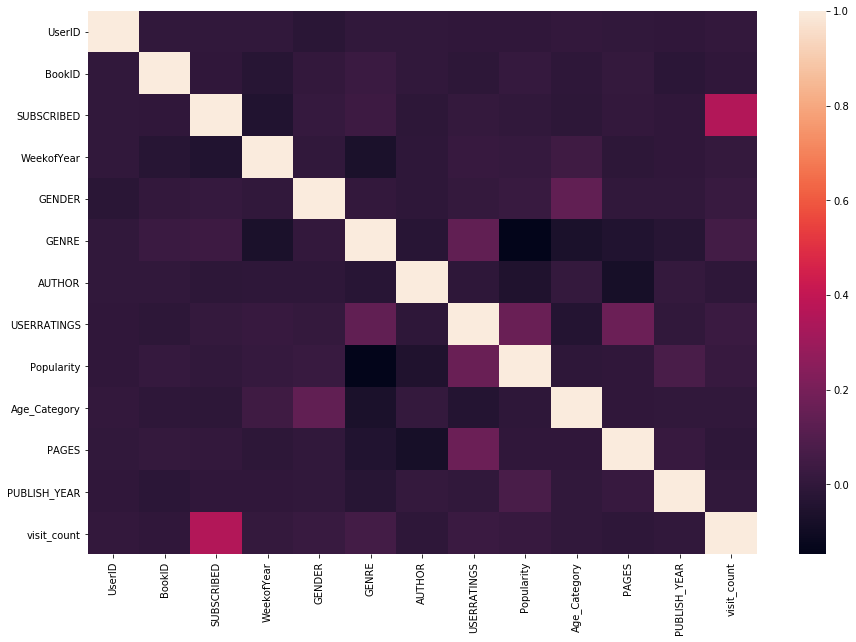

In [218]:
import seaborn as sns
correlation = df_grpd.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values)

### Creating custom ratings per user

In [220]:
df_grpd.head()

,UserID,BookID,SUBSCRIBED,WeekofYear,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,USERRATINGS,Popularity,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY,visit_count
5,654353,170387,0,201836,0,California,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...,1
8,611604,170387,0,201836,1,Pennsylvania,9,Standard Operating Procedure,1672,3.91,6.385506,4,286.0,2008,An utterly original literary and intellectual ...,1
9,674336,170387,0,201836,0,Georgia,9,Standard Operating Procedure,1672,3.91,6.385506,5,286.0,2008,An utterly original literary and intellectual ...,1
10,626189,170387,0,201836,0,California,9,Standard Operating Procedure,1672,3.91,6.385506,5,286.0,2008,An utterly original literary and intellectual ...,1
11,619059,170387,0,201836,1,California,9,Standard Operating Procedure,1672,3.91,6.385506,5,286.0,2008,An utterly original literary and intellectual ...,1


In [258]:
#df_grpd['Popularity']=(df_grpd['Popularity']-df_grpd['Popularity'].mean())/df_grpd['Popularity'].std()
#df_grpd['visit_count']=(df_grpd['visit_count']-df_grpd['visit_count'].mean())/df_grpd['visit_count'].std()

In [248]:
#df_grpd['visit_count'] = (df_grpd['visit_count']-df_grpd['visit_count'].min())/(df_grpd['visit_count'].max()-df_grpd['visit_count'].min())

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))

df_grpd[['Popularity', 'visit_count']] = scaler.fit_transform(df_grpd[['Popularity', 'visit_count']])

In [90]:
df_grpd['visit_count'].max()

5.0

In [91]:
df_grpd['U_RATING'] = df_grpd.apply(lambda row: row['SUBSCRIBED'] * ((row['USERRATINGS']*.3) + (row['Popularity']*.2) + (row['visit_count']*.5)), axis=1)

## Finding Highest rated book for each user

In [92]:
df_grpd[['U_RATING']] = scaler.fit_transform(df_grpd[['U_RATING']])

In [93]:
df_grpd.head(5)

,UserID,BookID,SUBSCRIBED,WeekofYear,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,USERRATINGS,Popularity,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY,visit_count,U_RATING
5,654353,170387,0,201836,FEMALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,0.00085,45-54,286.0,2008,An utterly original literary and intellectual ...,0.0,0.0
8,611604,170387,0,201836,MALE,Pennsylvania,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,0.00085,45-54,286.0,2008,An utterly original literary and intellectual ...,0.0,0.0
9,674336,170387,0,201836,FEMALE,Georgia,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,0.00085,55-64,286.0,2008,An utterly original literary and intellectual ...,0.0,0.0
10,626189,170387,0,201836,FEMALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,0.00085,55-64,286.0,2008,An utterly original literary and intellectual ...,0.0,0.0
11,619059,170387,0,201836,MALE,California,Nonfiction,Standard Operating Procedure,Philip Gourevitch,3.91,0.00085,55-64,286.0,2008,An utterly original literary and intellectual ...,0.0,0.0


In [94]:
df_highest_rated = df_grpd[['UserID','BookID','GENDER','STATE','GENRE','BOOKNAME','AUTHOR','Age_Category','PAGES','PUBLISH_YEAR','SUMMARY','U_RATING']].copy()

In [95]:
df_highest_rated.shape

(321244, 12)

In [96]:
df_highest_rated = df_highest_rated.sort_values('U_RATING', ascending=False).drop_duplicates(['UserID'])

In [97]:
df_highest_rated.shape  #12628 rows

(12628, 12)

In [73]:
len(df_highest_rated['UserID'].unique())

12628

In [101]:
df_highest_rated.head(5)

,UserID,BookID,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY,U_RATING
163854,646637,112318,FEMALE,NaN,Nonfiction,A 2nd Helping of Chicken Soup for the Soul: 10...,Jack Canfield,45-54,446.0,1996,"The runaway bestseller ""Chicken Soup for the S...",5.000000
4621,621033,119228,MALE,Delaware,Classics,Pride and Prejudice,Jane Austen,35-44,279.0,2000,"Since its immediate success in 1813, Pride and...",4.517225
348037,667563,141194,MALE,Texas,Nonfiction,The South Beach Diet Supercharged: Faster Weig...,Arthur Agatston,45-54,337.0,2008,"Five years ago, with the publication of The So...",4.292534
3922,656318,119228,MALE,NaN,Classics,Pride and Prejudice,Jane Austen,55-64,279.0,2000,"Since its immediate success in 1813, Pride and...",4.265191
105383,662455,134452,FEMALE,Iowa,Classics,Pride and Prejudice,Jane Austen,25-34,279.0,2000,"Since its immediate success in 1813, Pride and...",4.265156


In [99]:
df_highest_rated_filtered = df_highest_rated[['UserID','BookID','GENDER','STATE','GENRE','BOOKNAME','AUTHOR','Age_Category','PAGES','PUBLISH_YEAR','SUMMARY']].copy()

In [100]:
df_highest_rated_filtered.to_csv('../Data/df_highest_rated_filtered.csv')

## Merging all columns to 1, to perform Tfidf for cosine similarity

In [102]:
df_highest_rated_copy = df_highest_rated.copy()

In [103]:
df_highest_rated_copy.shape

(12628, 12)

In [105]:
df_highest_rated_copy['GENDER'] = LabelEncoder().fit_transform(df_highest_rated_copy['GENDER'])
df_highest_rated_copy['Age_Category'] = LabelEncoder().fit_transform(df_highest_rated_copy['Age_Category'])

In [106]:
df_highest_rated_copy.head(5)

,UserID,BookID,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY,U_RATING
163854,646637,112318,0,NaN,Nonfiction,A 2nd Helping of Chicken Soup for the Soul: 10...,Jack Canfield,4,446.0,1996,"The runaway bestseller ""Chicken Soup for the S...",5.000000
4621,621033,119228,1,Delaware,Classics,Pride and Prejudice,Jane Austen,3,279.0,2000,"Since its immediate success in 1813, Pride and...",4.517225
348037,667563,141194,1,Texas,Nonfiction,The South Beach Diet Supercharged: Faster Weig...,Arthur Agatston,4,337.0,2008,"Five years ago, with the publication of The So...",4.292534
3922,656318,119228,1,NaN,Classics,Pride and Prejudice,Jane Austen,5,279.0,2000,"Since its immediate success in 1813, Pride and...",4.265191
105383,662455,134452,0,Iowa,Classics,Pride and Prejudice,Jane Austen,2,279.0,2000,"Since its immediate success in 1813, Pride and...",4.265156


In [107]:
df_highest_rated_copy = df_highest_rated_copy.sort_values('U_RATING', ascending=False).drop_duplicates(['GENDER','Age_Category'])

In [108]:
df_highest_rated_copy.shape

(14, 12)

In [109]:
df_highest_rated_copy.head(5)

,UserID,BookID,GENDER,STATE,GENRE,BOOKNAME,AUTHOR,Age_Category,PAGES,PUBLISH_YEAR,SUMMARY,U_RATING
163854,646637,112318,0,NaN,Nonfiction,A 2nd Helping of Chicken Soup for the Soul: 10...,Jack Canfield,4,446.0,1996,"The runaway bestseller ""Chicken Soup for the S...",5.000000
4621,621033,119228,1,Delaware,Classics,Pride and Prejudice,Jane Austen,3,279.0,2000,"Since its immediate success in 1813, Pride and...",4.517225
348037,667563,141194,1,Texas,Nonfiction,The South Beach Diet Supercharged: Faster Weig...,Arthur Agatston,4,337.0,2008,"Five years ago, with the publication of The So...",4.292534
3922,656318,119228,1,NaN,Classics,Pride and Prejudice,Jane Austen,5,279.0,2000,"Since its immediate success in 1813, Pride and...",4.265191
105383,662455,134452,0,Iowa,Classics,Pride and Prejudice,Jane Austen,2,279.0,2000,"Since its immediate success in 1813, Pride and...",4.265156


In [111]:
df_book_age_highest = df_highest_rated_copy[['GENDER','Age_Category','BookID']].copy()

In [114]:
df_book_age_highest.head()

,GENDER,AGEGROUP,BookID
163854,0,4,112318
4621,1,3,119228
348037,1,4,141194
3922,1,5,119228
105383,0,2,134452


In [113]:
df_book_age_highest.rename(columns = {"Age_Category":"AGEGROUP"}, inplace=True)

In [117]:
df_book_age_highest.to_csv('../Data/Output/df_book_age_highest.csv') # File to use in prediction of missing members

In [237]:
user_rating_pivot.to_csv('../Data/user_rating_pivot.csv')

In [273]:
df_rating[['U_RATING']] = scaler.fit_transform(df_rating[['U_RATING']])

In [275]:
df_rating.to_csv('../Data/df_rating.csv', index=False)


In [274]:
df_rating['U_RATING'].max()

5.0